### ML ASSIGNMENT 4
### Name: Prabhat Dwivedi
### Roll No: 2018IMT-067
### Course: Machine Learning Lab
### Course Code: ITIT - 4107
### Deadline : 18 October 2021

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading data from dataset

In [5]:
data = pd.read_csv('ex1data1.txt' , header = None).values 
X=data[:,0]
y=data[:,1]

Plotting population vs Profit graph

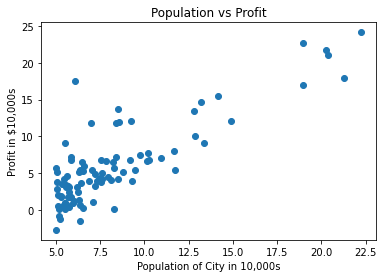

In [6]:
m = len(y)
plt.scatter(X,y)
plt.title('Population vs Profit')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

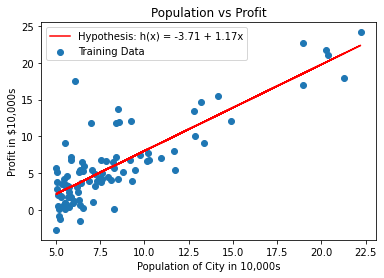

In [7]:
ones = np.ones((m,1))
X = np.stack([np.ones(m), X], axis=1)

def computeCost(X,y,theta):
    J = (np.sum(((X @ theta) - y)*((X @ theta) - y))/(2*m))
    return J

theta = np.zeros(2)
J = computeCost(X, y, theta)
theta = np.array([-1,2])
J = computeCost(X, y, theta)

def gradientDescent(X, y, theta, alpha, iterations):
    m = y.size
    J_history = np.zeros(iterations)

    for i in np.arange(iterations):
        h = X@theta
        theta = theta - alpha * (1 / m) * (X.T@(h-y))
        J_history[i] = computeCost(X, y, theta)
    return (theta, J_history)

iterations = 1500
alpha = 0.01

theta, Cost_J = gradientDescent(X, y, theta, alpha, iterations)

plt.scatter(X[:,1],y, label = 'Training Data')
plt.title('Population vs Profit')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], X@theta,color='red',label='Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.legend(loc='best')
plt.show()

Doing following for theta0 theta1 for n steps n=1500

1. Contour built using matplotlib plt contour function

2. For theta0 from range -10,10 and theta1 from range -1,4 cost is calculated and these 3 variables
are passed to contour function

[-3.70968912  1.17433871]


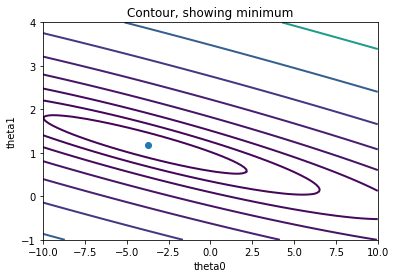

In [8]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])


plt.contour(theta0_vals, theta1_vals, J_vals.T, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.scatter(theta[0], theta[1])
plt.title('Contour, showing minimum')
print(theta)
plt.show()